In [1051]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from common.utils import load_data, mape, TimeSeriesTensor, create_evaluation_df
import datetime as dt

In [1052]:
uber = pd.read_csv('../uber_data.csv',parse_dates=["pickup_dt"])

In [1053]:
uber.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [1054]:
uber_january=uber.copy()[uber.pickup_dt<'2015-02-01 00:00:00']
uber_january

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.00,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.00,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.00,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.00,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.00,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,2015-01-31 23:00:00,EWR,0,7.0,10.0,24.0,1.0,1020.3,0.0,0.0,0.06,7.0,N
4893,2015-01-31 23:00:00,Manhattan,5295,7.0,10.0,24.0,1.0,1020.3,0.0,0.0,0.06,7.0,N
4894,2015-01-31 23:00:00,Queens,386,7.0,10.0,24.0,1.0,1020.3,0.0,0.0,0.06,7.0,N
4895,2015-01-31 23:00:00,Staten Island,1,7.0,10.0,24.0,1.0,1020.3,0.0,0.0,0.06,7.0,N


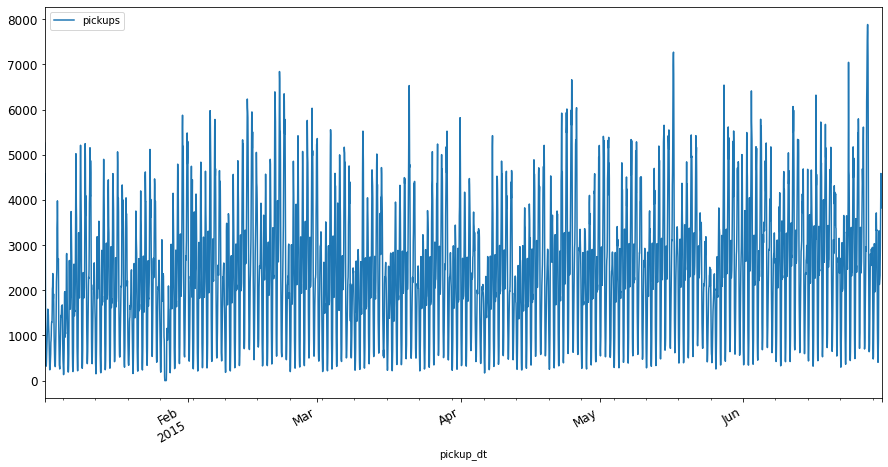

In [1055]:
manhattan=uber[uber.borough=='Manhattan']
manhattan.plot(x = "pickup_dt",y=['pickups'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [1056]:
#1month
valid_start_one_month_dt='2015-01-17 00:00:00'
test_start_one_month_dt='2015-01-24 00:00:00'

#6months
valid_start_dt = '2015-04-20 00:00:00'
test_start_dt = '2015-05-26 00:00:00'

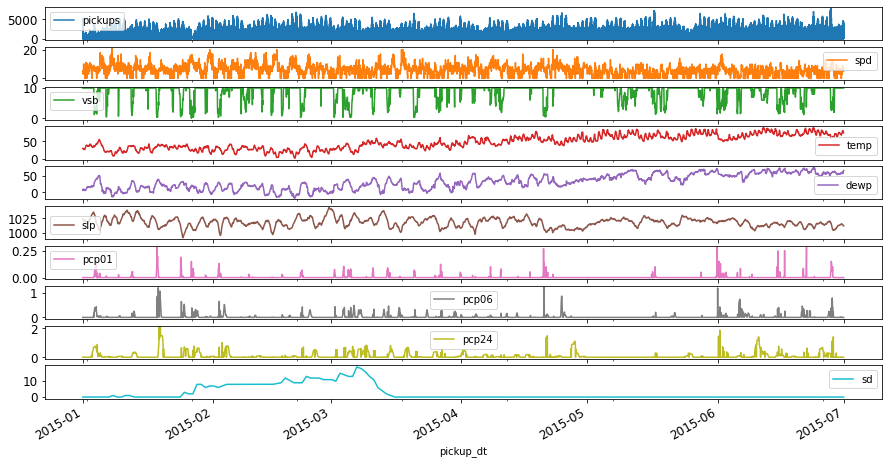

In [1057]:
uber.plot(x='pickup_dt',y=['pickups','spd','vsb','temp','dewp','slp','pcp01','pcp06','pcp24','sd','hday'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [1058]:
T = 7
HORIZON = 2

In [1059]:
train = manhattan.copy()[manhattan.pickup_dt < valid_start_dt]
train=train.set_index('pickup_dt').drop(columns=['borough','hday'])

y_scaler = MinMaxScaler()
y_scaler.fit(train[['pickups',]])

X_scaler = MinMaxScaler()
train[['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06','pcp24', 'sd']]=X_scaler.fit_transform(train)

In [1060]:
tensor_structure = {'X':(range(-T+1, 1),['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06','pcp24', 'sd'])}

train_inputs = TimeSeriesTensor(dataset=train,
                            target='pickups',
                            H=HORIZON,
                            tensor_structure=tensor_structure,
                            freq='H',
                            drop_incomplete=True)
train_inputs.dataframe.head(5)

tensor                 target                   X                      \
feature                     y             pickups                       
time step                 t+1       t+2       t-6       t-5       t-4   
pickup_dt                                                               
2015-01-01 07:00:00  0.048085  0.046624  0.768489  0.635048  0.668956   
2015-01-01 08:00:00  0.046624  0.061386  0.635048  0.668956  0.438907   
2015-01-01 09:00:00  0.061386  0.085647  0.668956  0.438907  0.191903   
2015-01-01 10:00:00  0.085647  0.112540  0.438907  0.191903  0.098217   
2015-01-01 11:00:00  0.112540  0.136071  0.191903  0.098217  0.062993   

tensor                                                                 ...  \
feature                                                           spd  ...   
time step                 t-3       t-2       t-1         t       t-6  ...   
pickup_dt                                                              ...   
2015-01-01 07:00:00  0.438907  0.191903  0.098217  0.062993  0.238095  ...   
2015-01-01 08:00:00  0.191903  0.098217  0.062993  0.048085  0.142857  ...   
2015-01-01 09:00:00  0.098217  0.062993  0.048085  0.046624  0.238095  ...   
2015-01-01 10:00:00  0.062993  0.048085  0.046624  0.061386  0.238095  ...   
2015-01-01 11:00:00  0.048085  0.046624  0.061386  0.085647  0.238095  ...   

tensor                                                                  
feature             pcp24             sd                                
time step             t-2  t-1    t  t-6  t-5  t-4  t-3  t-2  t-1    t  
pickup_dt                                                               
2015-01-01 07:00:00   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2015-01-01 08:00:00   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2015-01-01 09:00:00   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2015-01-01 10:00:00   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2015-01-01 11:00:00   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 72 columns]

In [1061]:
X_train = train_inputs['X']
y_train = train_inputs['target']

In [1062]:
look_back_dt = dt.datetime.strptime(valid_start_dt, '%Y-%m-%d %H:%M:%S') - dt.timedelta(hours=T-1)
valid = manhattan.copy()[(manhattan.pickup_dt >=look_back_dt) & (uber.pickup_dt < test_start_dt)]
valid=valid.set_index('pickup_dt').drop(columns=['borough','hday'])
valid[['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06','pcp24', 'sd']] = X_scaler.transform(valid)

valid_inputs = TimeSeriesTensor(valid, 'pickups', HORIZON, tensor_structure)
y_valid = valid_inputs['target']
X_valid = valid_inputs['X']

<ipython-input-1062-41010234499a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid = manhattan.copy()[(manhattan.pickup_dt >=look_back_dt) & (uber.pickup_dt < test_start_dt)]


In [1063]:
from keras.models import Model, Sequential
from keras.layers import Conv1D, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
from keras import optimizers

In [1064]:
LATENT_DIM = 5
KERNEL_SIZE = 2
BATCH_SIZE = 32
EPOCHS = 60

In [1065]:
# Fill in your code to replace the question mark
# Hint: there is a parameter you need to add when stacking multiple RNN layers
model = Sequential()
model.add(Conv1D(LATENT_DIM,activation='relu',padding='causal',kernel_size=KERNEL_SIZE,input_shape=(T,10),dilation_rate=1))
model.add(Conv1D(LATENT_DIM,activation='relu',padding='causal',kernel_size=KERNEL_SIZE,dilation_rate=2))
model.add(Conv1D(LATENT_DIM,activation='relu',padding='causal',kernel_size=KERNEL_SIZE,dilation_rate=4))
model.add(Conv1D(LATENT_DIM,activation='relu',padding='causal',kernel_size=KERNEL_SIZE,dilation_rate=8))
model.add(Conv1D(LATENT_DIM,activation='relu',padding='causal',kernel_size=KERNEL_SIZE,dilation_rate=16))
model.add(Conv1D(LATENT_DIM,activation='relu',padding='causal',kernel_size=KERNEL_SIZE,dilation_rate=32))
model.add(Flatten())
model.add(Dense(HORIZON))

In [1066]:
model.compile(optimizer='RMSprop', loss='mse')
model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_260 (Conv1D)          (None, 7, 5)              105       
_________________________________________________________________
conv1d_261 (Conv1D)          (None, 7, 5)              55        
_________________________________________________________________
conv1d_262 (Conv1D)          (None, 7, 5)              55        
_________________________________________________________________
conv1d_263 (Conv1D)          (None, 7, 5)              55        
_________________________________________________________________
conv1d_264 (Conv1D)          (None, 7, 5)              55        
_________________________________________________________________
conv1d_265 (Conv1D)          (None, 7, 5)              55        
_________________________________________________________________
flatten_47 (Flatten)         (None, 35)              

In [1067]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100)

history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/60
82/82 [==============================] - 1s 8ms/step - loss: 0.0608 - val_loss: 0.0423
Epoch 2/60
82/82 [==============================] - 0s 5ms/step - loss: 0.0355 - val_loss: 0.0381
Epoch 3/60
82/82 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0330
Epoch 4/60
82/82 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.0174
Epoch 5/60
82/82 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0198
Epoch 6/60
82/82 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0109
Epoch 7/60
82/82 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.0095
Epoch 8/60
82/82 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.0093
Epoch 9/60
82/82 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0102
Epoch 10/60
82/82 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 11/60
82/82 [

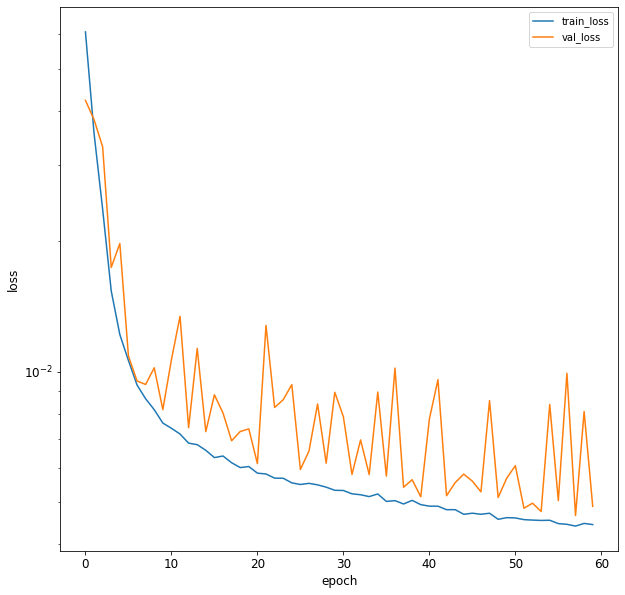

In [1068]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [1069]:
look_back_dt = dt.datetime.strptime(test_start_dt, '%Y-%m-%d %H:%M:%S') - dt.timedelta(hours=T-1)
test = manhattan.copy()[manhattan.pickup_dt>test_start_dt]
test=test.set_index('pickup_dt').drop(columns=['borough','hday'])
test[['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06','pcp24', 'sd']] = X_scaler.transform(test)
test_inputs = TimeSeriesTensor(test, 'pickups', HORIZON, tensor_structure)
X_test = test_inputs['X']
y_test = test_inputs['target']

In [1070]:
predictions = model.predict(X_test)
eval_df = create_evaluation_df(predictions, test_inputs, HORIZON, y_scaler)
eval_df

,timestamp,h,prediction,actual
0,2015-05-26 07:00:00,t+1,2426.825584,2459.0
1,2015-05-26 08:00:00,t+1,2806.408348,2742.0
2,2015-05-26 09:00:00,t+1,2879.501231,2098.0
3,2015-05-26 10:00:00,t+1,1927.529345,1861.0
4,2015-05-26 11:00:00,t+1,1878.297920,1873.0
...,...,...,...,...
1705,2015-06-30 17:00:00,t+2,4243.629288,4585.0
1706,2015-06-30 18:00:00,t+2,4837.978839,4210.0
1707,2015-06-30 19:00:00,t+2,4712.666675,4313.0
1708,2015-06-30 20:00:00,t+2,3982.249248,4452.0


In [1071]:
eval_df['APE'] = (eval_df['prediction'] - eval_df['actual']).abs() / eval_df['actual']
eval_df.groupby('h')['APE'].mean()

h
t+1    0.161589
t+2    0.237114
Name: APE, dtype: float64

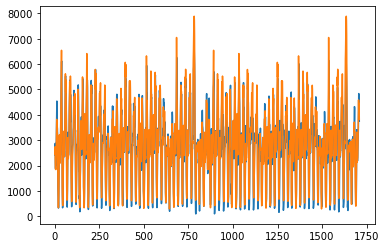

In [1072]:
eval_df['prediction'].plot()
eval_df['actual'].plot()

In [1073]:
def smape_perso(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [1074]:
smape_perso(eval_df['prediction'],eval_df['actual'])

20.0622826979586